In [1]:
# Import the SQL ALchemy engine
from sqlalchemy import create_engine

# Database credentials
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'department_of_education'

# use the credentials to start a connection
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

In [53]:
# quesiton1
sql = '''
    SELECT column_name, data_type
    FROM information_schema.columns
    WHERE table_name = 'naep'
'''
results = engine.execute(sql)
rows = results.fetchall()
rows

[('avg_math_4_score', 'numeric'),
 ('avg_math_8_score', 'numeric'),
 ('avg_reading_4_score', 'numeric'),
 ('avg_reading_8_score', 'numeric'),
 ('id', 'character varying'),
 ('state', 'character varying'),
 ('year', 'integer')]

In [54]:
# question2
sql = '''
    SELECT * 
    FROM naep
    limit 50
'''
results = engine.execute(sql)
rows = results.fetchall()
rows

[(Decimal('232.171'), Decimal('268.312'), Decimal('216.42'), Decimal('257.687'), '2017_ALABAMA', 'ALABAMA', 2017),
 (Decimal('230.456'), Decimal('277.016'), Decimal('207.038'), Decimal('257.668'), '2017_ALASKA', 'ALASKA', 2017),
 (Decimal('234.436'), Decimal('282.248'), Decimal('215.466'), Decimal('262.957'), '2017_ARIZONA', 'ARIZONA', 2017),
 (Decimal('233.848'), Decimal('273.76'), Decimal('216.108'), Decimal('259.956'), '2017_ARKANSAS', 'ARKANSAS', 2017),
 (Decimal('232.263'), Decimal('276.638'), Decimal('215.422'), Decimal('262.521'), '2017_CALIFORNIA', 'CALIFORNIA', 2017),
 (Decimal('240.695'), Decimal('286.248'), Decimal('224.692'), Decimal('270.339'), '2017_COLORADO', 'COLORADO', 2017),
 (Decimal('239.238'), Decimal('284.144'), Decimal('228.355'), Decimal('272.538'), '2017_CONNECTICUT', 'CONNECTICUT', 2017),
 (Decimal('236.128'), Decimal('278.023'), Decimal('221.482'), Decimal('263.089'), '2017_DELAWARE', 'DELAWARE', 2017),
 (Decimal('231.32'), Decimal('265.78'), Decimal('213.382

In [55]:
# question3
sql = '''
    SELECT COUNT(avg_math_4_score), AVG(avg_math_4_score), MIN(avg_math_4_score), MAX(avg_math_4_score)
    FROM naep
    GROUP BY state
    ORDER BY state ASC
'''
results = engine.execute(sql)
rows = results.fetchall()
rows

[(11, Decimal('224.5554545454545455'), Decimal('208.328'), Decimal('232.861')),
 (9, Decimal('234.0097777777777778'), Decimal('223.833'), Decimal('237.274')),
 (11, Decimal('229.0680000000000000'), Decimal('215.254'), Decimal('240.305')),
 (11, Decimal('229.9675454545454545'), Decimal('210.206'), Decimal('239.891')),
 (11, Decimal('225.6595454545454545'), Decimal('208.399'), Decimal('234.165')),
 (10, Decimal('237.8267000000000000'), Decimal('221.023'), Decimal('246.976')),
 (11, Decimal('238.9570909090909091'), Decimal('226.798'), Decimal('244.718')),
 (10, Decimal('234.8061000000000000'), Decimal('215.025'), Decimal('243.108')),
 (11, Decimal('212.2754545454545455'), Decimal('187.135'), Decimal('231.32')),
 (10, Decimal('235.6613000000000000'), Decimal('213.69'), Decimal('246.368')),
 (11, Decimal('230.6353636363636364'), Decimal('215.456'), Decimal('240.047')),
 (11, Decimal('229.9740909090909091'), Decimal('214.057'), Decimal('243.309')),
 (10, Decimal('236.6816000000000000'), Deci

In [56]:
# question4
sql = '''
    SELECT COUNT(avg_math_4_score), AVG(avg_math_4_score), MIN(avg_math_4_score), MAX(avg_math_4_score)
    FROM naep
    GROUP BY state
    HAVING MAX(avg_math_4_score) - MIN(avg_math_4_score) > 30
    ORDER BY state ASC
'''
results = engine.execute(sql)
rows = results.fetchall()
rows

[(11, Decimal('212.2754545454545455'), Decimal('187.135'), Decimal('231.32')),
 (10, Decimal('235.6613000000000000'), Decimal('213.69'), Decimal('246.368')),
 (11, Decimal('224.7707272727272727'), Decimal('204.14'), Decimal('234.282')),
 (11, Decimal('223.2370000000000000'), Decimal('201.828'), Decimal('234.694')),
 (11, Decimal('237.4870000000000000'), Decimal('212.884'), Decimal('244.802'))]

In [28]:
# question5
sql = '''
    SELECT state AS bottom_10_sates
    FROM naep
    WHERE year = 2000
    ORDER BY avg_math_4_score ASC
    limit 10
'''
results = engine.execute(sql)
rows = results.fetchall()
rows


[('DISTRICT_OF_COLUMBIA',),
 ('MISSISSIPPI',),
 ('CALIFORNIA',),
 ('NEW_MEXICO',),
 ('HAWAII',),
 ('ARKANSAS',),
 ('ALABAMA',),
 ('LOUISIANA',),
 ('ARIZONA',),
 ('GEORGIA',)]

In [26]:
# question6
sql = '''
    SELECT ROUND(AVG(avg_math_4_score), 2)
    FROM naep
    WHERE year = 2000
'''
results = engine.execute(sql)
rows = results.fetchall()
rows

[(Decimal('224.80'),)]

In [27]:
# question7
sql = '''
    SELECT state AS below_average_states_y2000
    FROM naep
    WHERE year = 2000
    AND avg_math_4_score < (SELECT AVG(avg_math_4_score)
                            FROM naep
                            WHERE year = 2000)
'''
results = engine.execute(sql)
rows = results.fetchall()
rows


[('ALABAMA',),
 ('ARIZONA',),
 ('ARKANSAS',),
 ('CALIFORNIA',),
 ('DISTRICT_OF_COLUMBIA',),
 ('GEORGIA',),
 ('HAWAII',),
 ('KENTUCKY',),
 ('LOUISIANA',),
 ('MARYLAND',),
 ('MISSISSIPPI',),
 ('NEVADA',),
 ('NEW_MEXICO',),
 ('RHODE_ISLAND',),
 ('SOUTH_CAROLINA',),
 ('TENNESSEE',)]

In [33]:
# question8
sql = '''
    SELECT state AS scores_missing_y2000
    FROM naep
    WHERE year = 2000
    AND avg_math_4_score IS NULL
'''

results = engine.execute(sql)
rows = results.fetchall()
rows

[('ALASKA',),
 ('COLORADO',),
 ('DELAWARE',),
 ('FLORIDA',),
 ('NEW_HAMPSHIRE',),
 ('NEW_JERSEY',),
 ('PENNSYLVANIA',),
 ('SOUTH_DAKOTA',),
 ('WASHINGTON',),
 ('WISCONSIN',)]

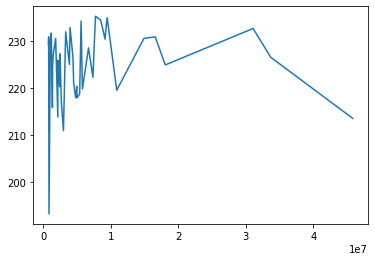

-0.6438780159473194

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
sql = '''
    SELECT ROUND(avg_math_4_score, 2) AS avg_s, total_expenditure AS t_e
    FROM naep left outer join finance
    ON naep.id = finance.id
    WHERE avg_math_4_score IS NOT NULL
    AND naep.year = 2000
    ORDER BY 2 DESC
'''

results = engine.execute(sql)
rows = results.fetchall()
rows
x = [x['t_e'] for x in rows]
y = [y['avg_s'] for y in rows]
plt.plot(x,y)
plt.show()
# total_expenditure seems not correlated with the average score

r2_score(x, y)
# the r2 showing the two parameter not correlated very well and they then to be negative correlated which is opposite to the assumption 